In [5]:
pip install pandas-ta

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218925 sha256=91c4673f49f66386e187e584d4a9035db798113d193299b59aae155941ae68ef
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\fd\ed\18\2a12fd1b7906c63efca6accb351929f2c7f6bbc674e1c0ba5d
Successfully built pandas-ta


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta
import datetime
import yfinance as yf

In [9]:
df = pd.read_csv("C:\\Users\\admin\\Downloads\\Nifty 50 Historical Data.csv")

In [15]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [35]:
ticker = input("Enter Your NSE Stock Shortform(for example HCLTECH for HCLTECH:")

start_date_entry = input('Enter a Start_date in YYYY-MM-DD format')
year, month, day = map(int, start_date_entry.split('-'))
start_date = datetime.date(year, month, day)

end_date_entry = input('Enter a end_date in YYYY-MM-DD format')
year, month, day = map(int, end_date_entry.split('-'))
end_date = datetime.date(year, month, day)

data = yf.download(ticker, start=start_date, end=end_date)

Enter Your NSE Stock Shortform(for example HCLTECH for HCLTECH: SBIN.NS
Enter a Start_date in YYYY-MM-DD format 2018-01-01
Enter a end_date in YYYY-MM-DD format 2025-01-01


[*********************100%***********************]  1 of 1 completed


In [37]:
data.to_csv(f"{ticker}_data.CSV")

In [49]:
data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2018-01-01,283.366272,288.579615,282.628082,286.595780,12182400
2018-01-02,279.813812,285.119433,278.060656,285.119433,14797364
2018-01-03,279.444702,282.766487,278.798789,281.705341,13857373
2018-01-04,284.658081,286.226711,279.721541,280.967215,24517099
2018-01-05,282.674255,287.333963,281.982218,287.333963,14580575


In [47]:
data.tail()

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-12-24,796.065369,809.936860,793.271493,808.025232,10602771
2024-12-26,796.457520,806.652767,792.095103,796.996681,8318714
2024-12-27,783.909485,802.192337,781.507699,800.231706,10649800
2024-12-30,772.782837,792.046064,769.547807,786.213174,21515438
2024-12-31,779.301941,783.468282,770.528104,771.459416,9086044


In [45]:
data.columns = data.columns.get_level_values(0)
print(data.head())

Price            Close        High         Low        Open    Volume
Date                                                                
2018-01-01  283.366272  288.579615  282.628082  286.595780  12182400
2018-01-02  279.813812  285.119433  278.060656  285.119433  14797364
2018-01-03  279.444702  282.766487  278.798789  281.705341  13857373
2018-01-04  284.658081  286.226711  279.721541  280.967215  24517099
2018-01-05  282.674255  287.333963  281.982218  287.333963  14580575


In [51]:
data.isnull().sum()

Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [53]:
data.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='Date', length=1727, freq=None)

In [77]:
data['EMA 50'] = ta.ema(data['Close'], length=50)

data['EMA 20'] = ta.ema(data['Close'], length = 20)

# calculating 14 days RSI
data['RSI 14'] = ta.rsi(data['Close'], length=14)

data['RSI 10'] = ta.rsi(data['Close'], length = 10)

data['ROC 10'] = ta.roc(data['Close'], length = 10)

# fill 0 in NaN value
data.dropna(subset = ['EMA 50'], inplace = True)
data.dropna(subset = ['RSI 14'], inplace = True)

In [79]:
data.head(10)

Price,Close,High,Low,Open,Volume,EMA 50,RSI 14,EMA 20,RSI 10,ROC 10
Date,,,,,,,,,,
2018-12-31,273.031830,275.200219,272.662749,274.231378,9526067,259.902505,60.528860,267.285410,61.647428,2.316743
2019-01-01,276.445923,277.460917,271.140302,274.508212,11837127,260.551267,64.063921,268.157840,66.606910,3.488781
2019-01-02,271.186401,279.121770,270.448239,275.984539,25559853,260.968331,55.776421,268.446274,54.535693,0.392816
2019-01-03,268.602783,272.708855,267.680067,272.201372,17548347,261.267721,52.203862,268.461180,49.626758,-3.192566
2019-01-04,274.646606,275.892280,268.971905,269.525540,19514041,261.792383,58.844697,269.050268,59.177675,1.224292
2019-01-07,273.400909,278.199047,272.385944,277.783813,14579399,262.247620,57.084216,269.464615,56.715032,1.507371
2019-01-08,281.705383,282.351296,271.970734,272.939575,22949961,263.010669,64.672179,270.630402,66.913800,4.180188
2019-01-09,281.705383,283.366290,277.507034,282.351296,21109911,263.743795,64.672179,271.685162,66.913800,3.790587
2019-01-10,281.936005,283.735313,280.044447,281.520799,16295468,264.457215,64.872219,272.661433,67.178934,4.586665


In [81]:
def buy_sell_signals(df):
    Buy = []
    Sell = []
    position = False

    for i in range(1, len(df)):
        close = df['Close'].iloc[i]
        rsi = df['RSI 14'].iloc[i]
        ema50 = df['EMA 50'].iloc[i]
        prev_close = df['Close'].iloc[i-1]
        prev_open = df['Open'].iloc[i-1]

        if not position and close > ema50 and 40 < rsi < 55 and prev_close > prev_open:
            Buy.append(close)
            Sell.append(None)
            position = True

        elif position and (rsi > 65 or close < ema50):
            Buy.append(None)
            Sell.append(close)
            position = False

        else:
            Buy.append(None)
            Sell.append(None)

    Buy.insert(0, None)
    Sell.insert(0, None)
    return Buy, Sell


data['Buy_Signal'], data['Sell_Signal'] = buy_sell_signals(data)

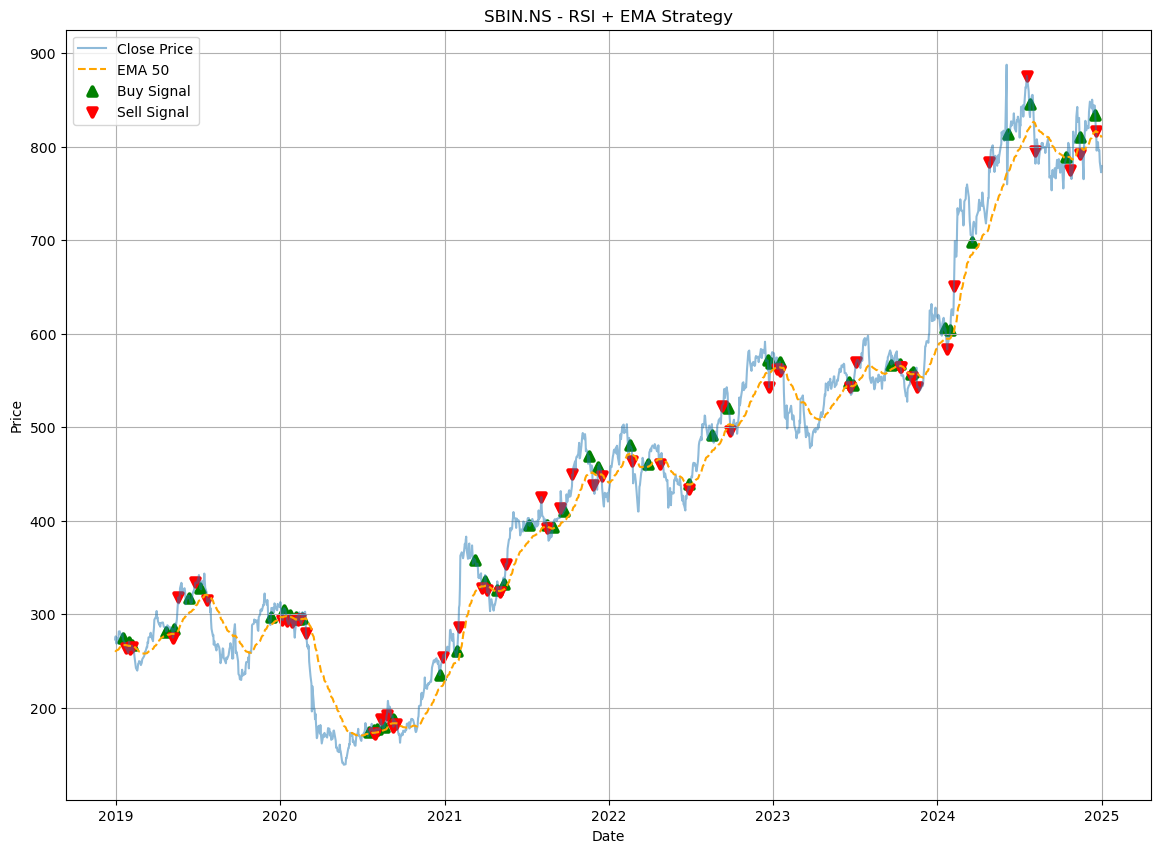

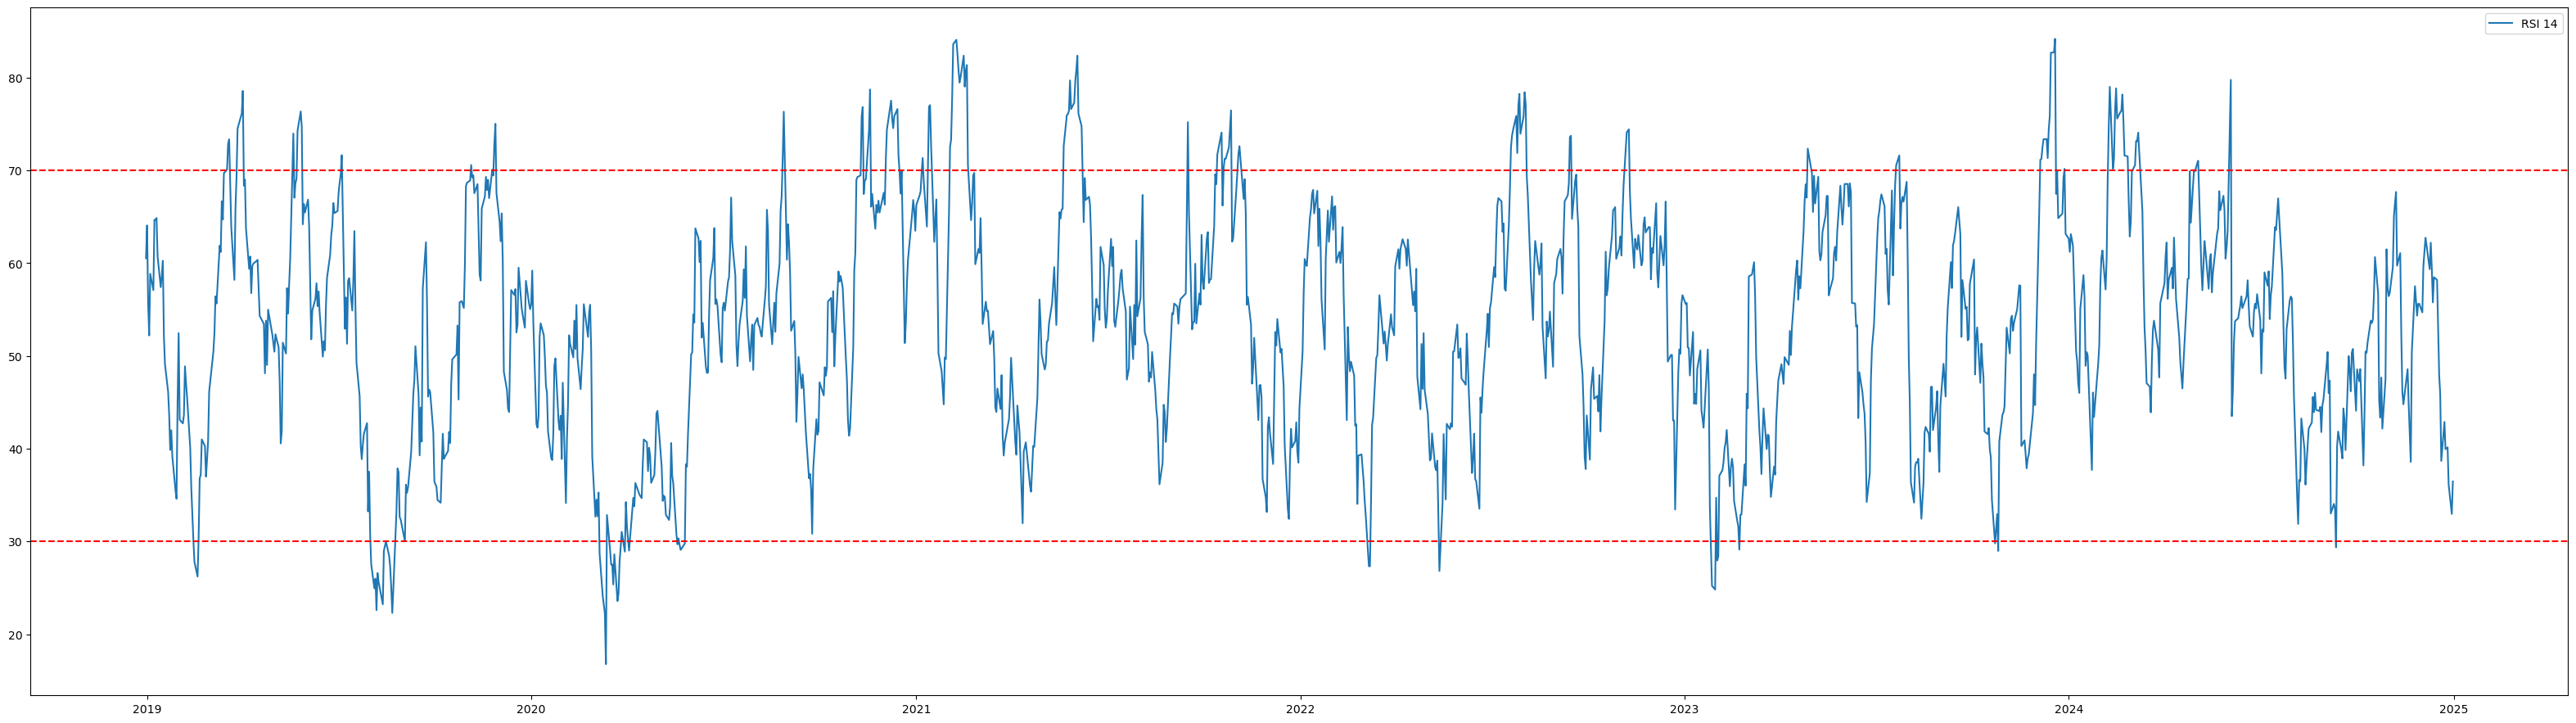

In [87]:
plt.figure(figsize=(14,10))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['EMA 50'], label='EMA 50', linestyle='--', color='orange')
plt.scatter(data.index, data['Buy_Signal'], label='Buy Signal', marker='^', color='green', lw=3)
plt.scatter(data.index, data['Sell_Signal'], label='Sell Signal', marker='v', color='red', lw=3)
plt.title(f"{ticker} - RSI + EMA Strategy")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

# Osciolator
plt.figure(figsize=(40,24))
plt.subplot(2,1,2)
plt.plot(data['RSI 14'], label='RSI 14')
plt.axhline(30, linestyle='--', color='r')
plt.axhline(70, linestyle='--', color='r')
plt.legend()
plt.show()